# Example for using the Python/SymPy tool chain with the signalflowgrapher
Hanspeter Schmid, 2.10.2020

## Draw a signal-flow graph
sfg.json

Screen shot:

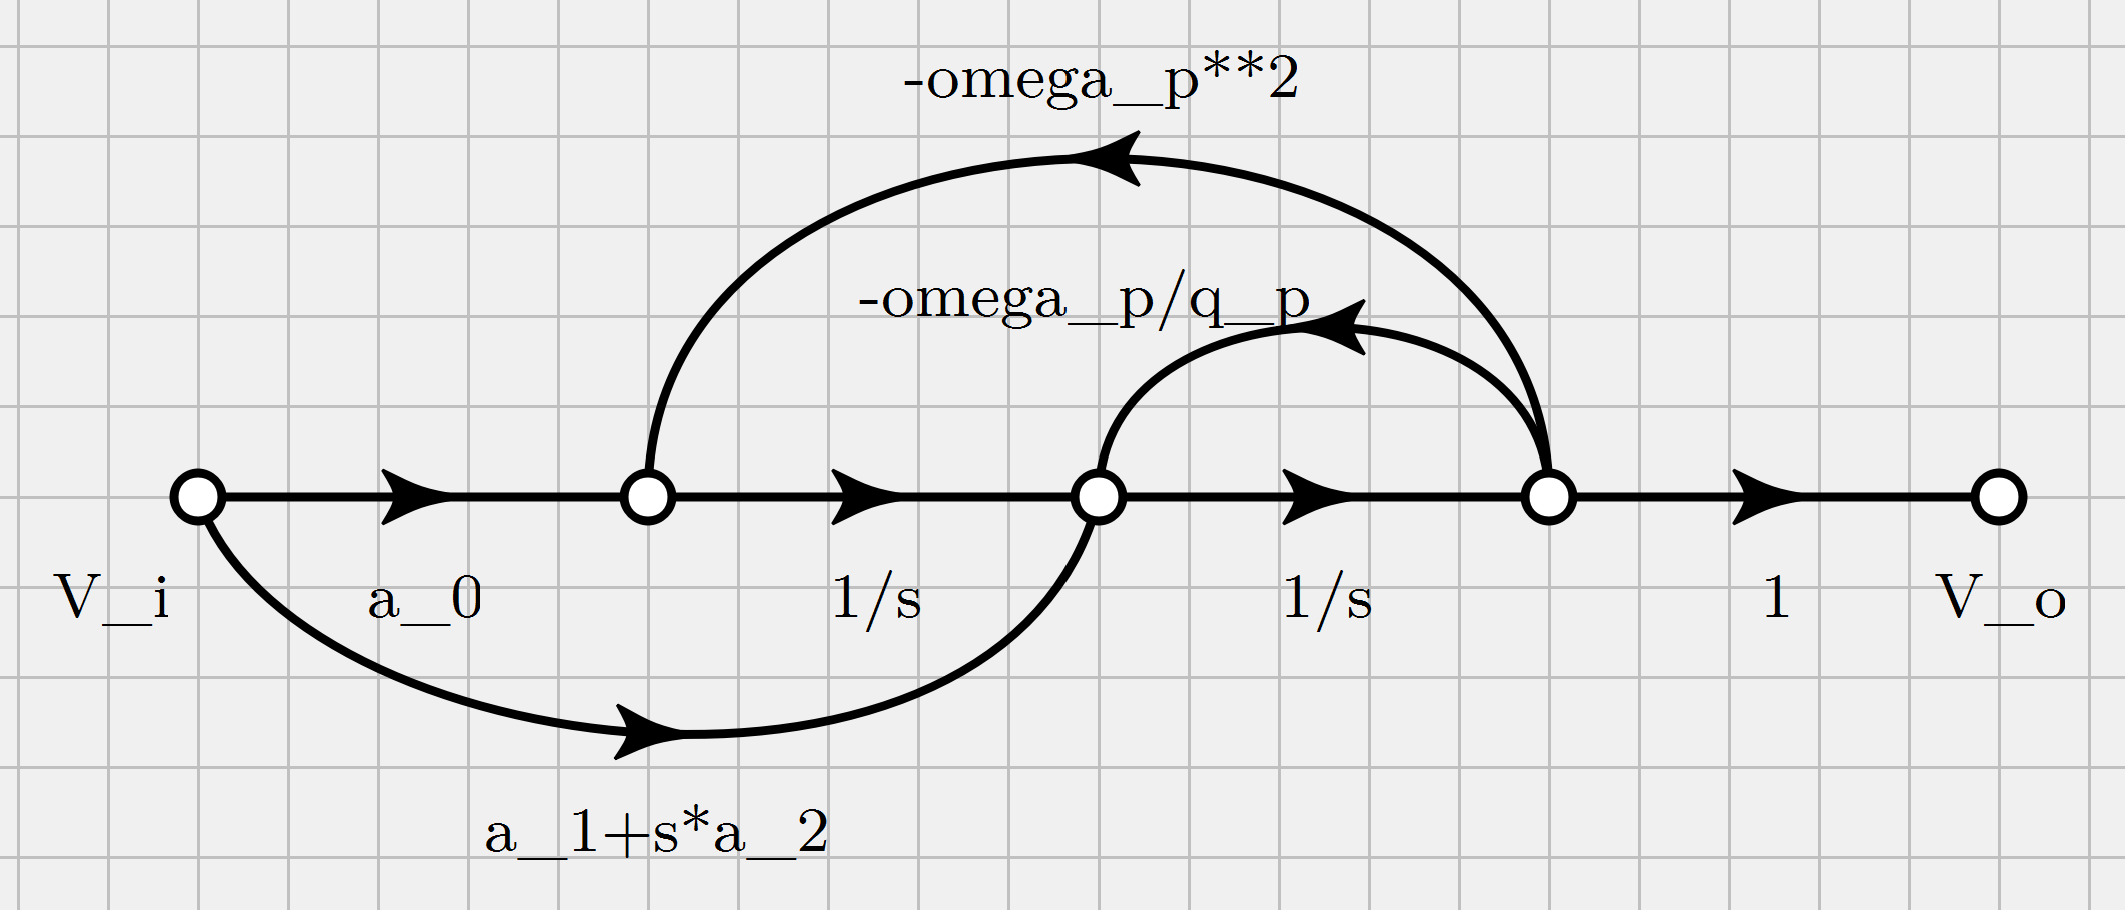

## Nice vector graphics for documentation / Jupyter notebooks
If you want it to look nicer, save as TikZ, translate with pdflatex to a pdf, and if you need it, make an svg from it with pdf2svg:



## Evaluate Mason in signalflowgrapher and paste code to Jupyter notebook

In [1]:
import sympy as sp
Delta = sp.symbols('Delta')
L1,L2 = sp.symbols('L1,L2')
T_num = sp.symbols('T_num')
T_den = sp.symbols('T_den')
T_io = sp.symbols('T_io')
q_p,a_0,omega_p,a_1,a_2,s = sp.symbols('q_p,a_0,omega_p,a_1,a_2,s')

loops = [(L1, -omega_p**2/s**2), (L2, -omega_p/(q_p*s))]
determinant = [(Delta, -L1 - L2 + 1)]
denominator = [(T_den, Delta)]

P1,D1,P2,D2 = sp.symbols('P1,D1,P2,D2')
paths = [(P1, (a_1 + a_2*s)/s), (D1, 1), (P2, a_0/s**2), (D2, 1)]
numerator = [(T_num, D1*P1 + D2*P2)]

transfer_function = [(T_io, T_num/T_den)]
T=T_io.subs(transfer_function).subs(numerator).subs(denominator).subs(determinant).subs(paths).subs(loops).simplify()
display(T)

q_p*(a_0 + s*(a_1 + a_2*s))/(omega_p**2*q_p + omega_p*s + q_p*s**2)

## Nicer expression with hanspitools
pip install hanspitools

In [2]:
import hanspitools as ht

In [3]:
ht.mani.numden(lambda p: ht.mani.nicepoly(p,s),T)

(a_0*q_p + a_1*q_p*s + a_2*q_p*s**2)/(omega_p**2*q_p + omega_p*s + q_p*s**2)

## Insert numbers and plot bode diagram

In [4]:
import numpy as np

In [5]:
target = [(a_0,1),(a_1,0),(a_2,0),(omega_p,1),(q_p,5)]
wn = 10.0**np.arange(-2,2,0.01)

In [6]:
T_a = ht.freq.amplitude(T,s,wn,target)
T_p = ht.freq.phase(T,s,wn,target)

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


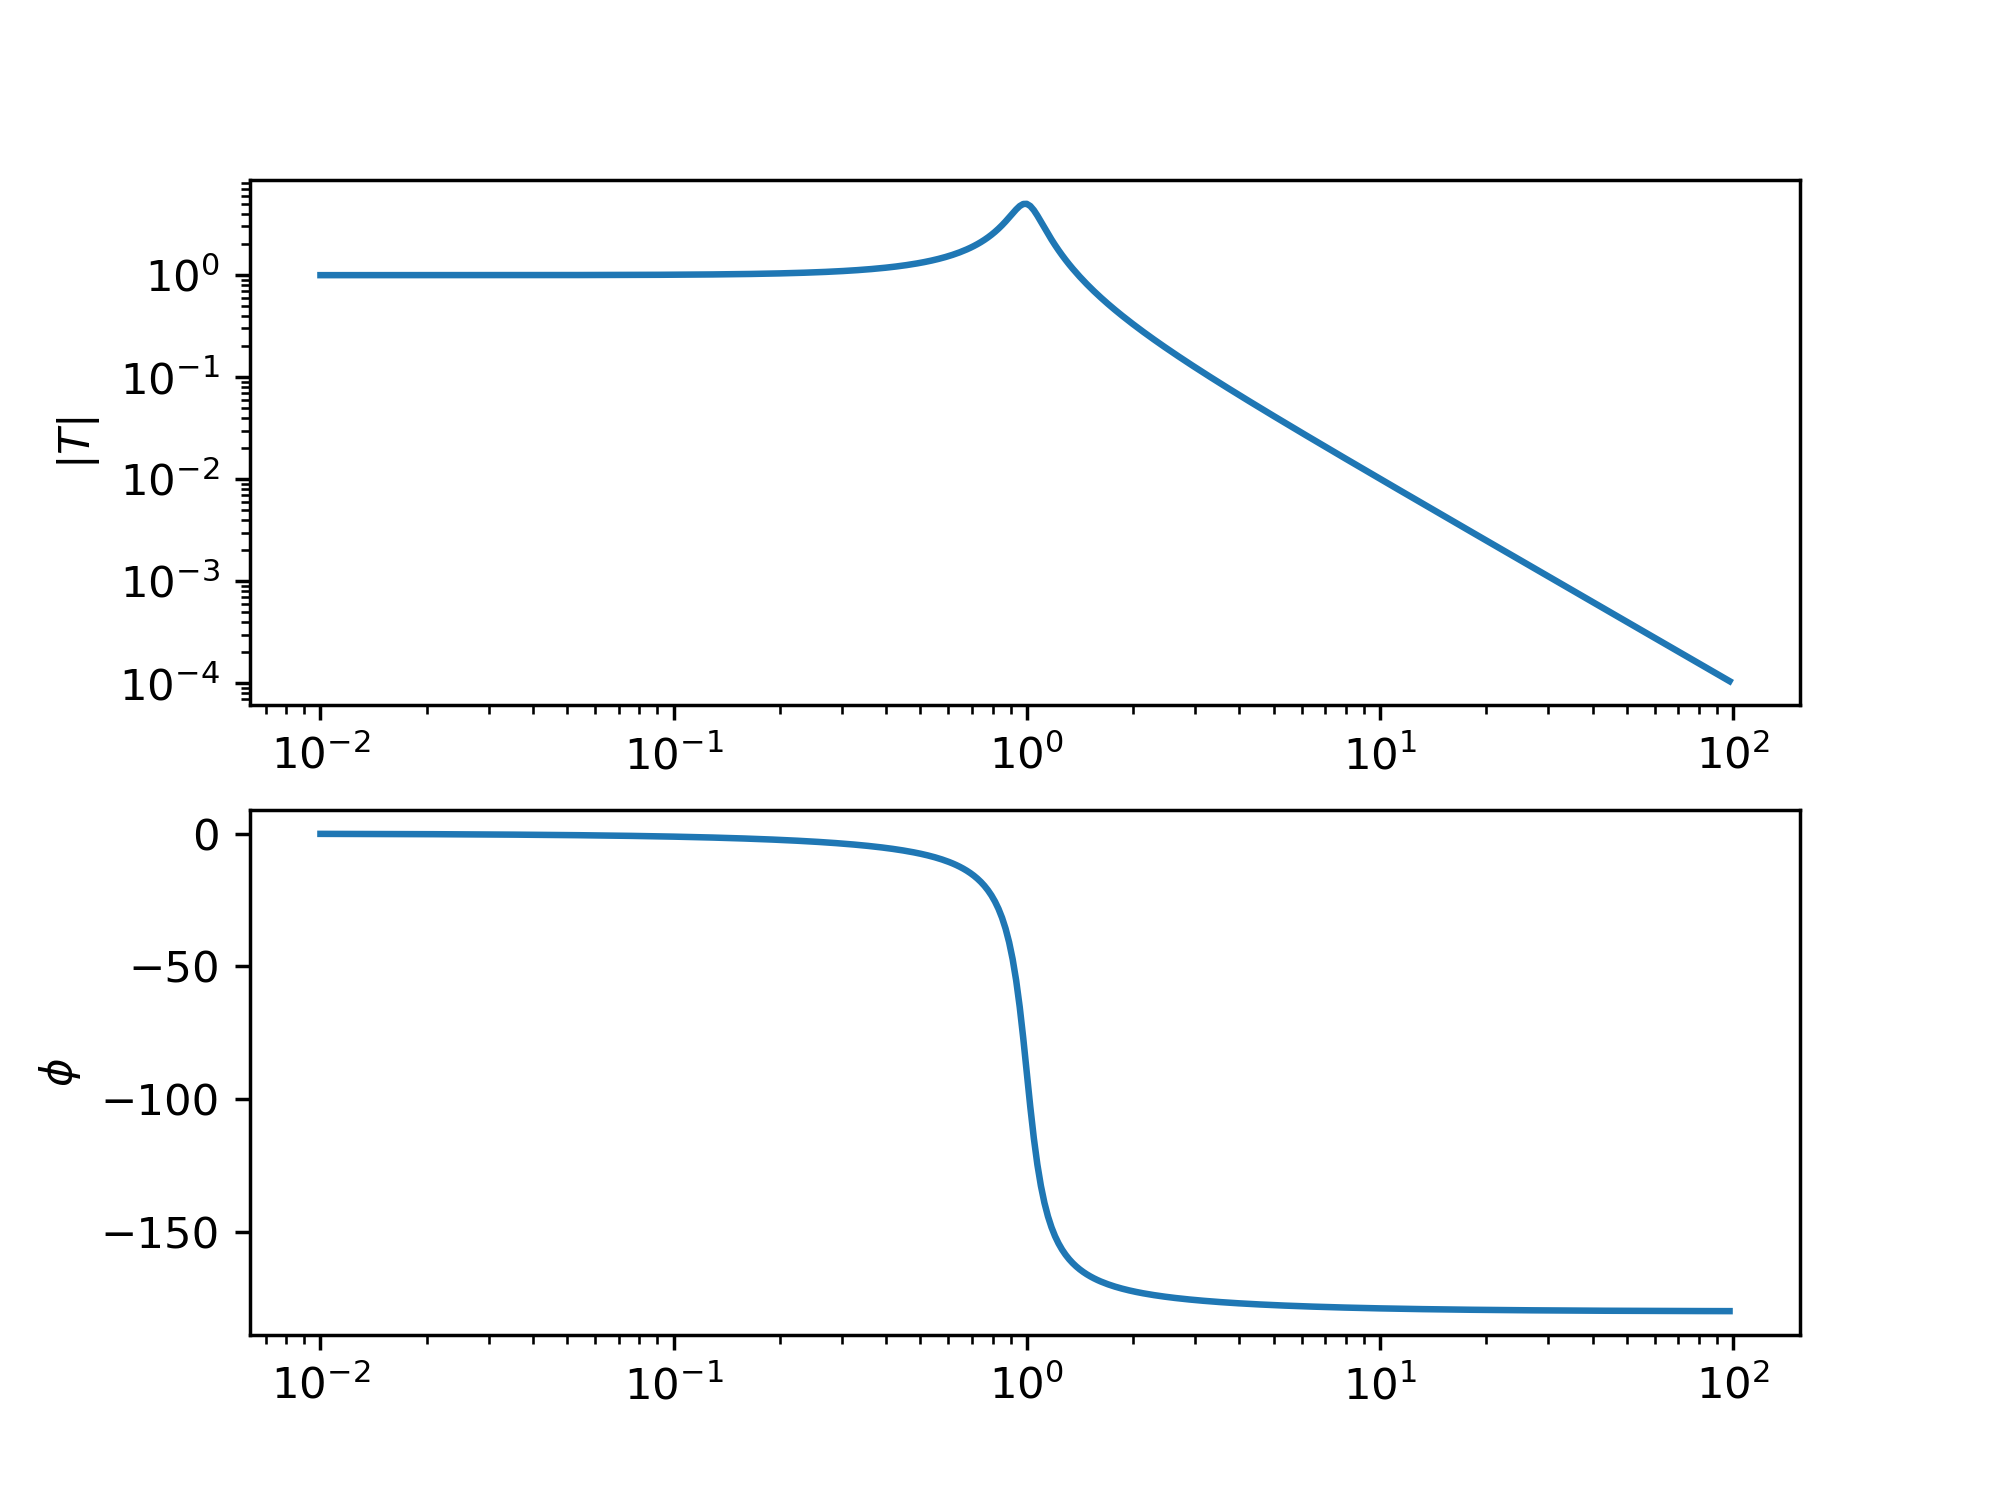

Text(0, 0.5, '$\\phi$')

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.loglog(wn,T_a)
plt.ylabel('$|T|$')
plt.subplot(2,1,2)
plt.semilogx(wn,T_p)
plt.ylabel('$\phi$')